In [ ]:
!pip install corextopic
!pip install joblib
!pip install -U deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt
import pandas as pd
import json
from deep_translator import GoogleTranslator
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [ ]:
datafile = 'support_tickets.csv'
df = pd.read_csv(datafile)

In [ ]:
df.head()
df.shape

(517, 10)

In [ ]:
def translate_comment(x):
    try:
        # Try to translate the string version of the comment
        return GoogleTranslator(source='auto', target='en').translate(str(x))
    except:
        # If there is an exception just return the TextBlob version of the input
        return str(x)

In [ ]:
df['body'] = df['SUJET'].apply(translate_comment)

In [ ]:
#Converting the DF to list to feed to the CorEx Model
dfToList = df['body'].tolist()

dfList = list(df['body'])

dfValues = df['body'].values
#print(dfList)
print(dfValues)

['Configuring different vlan networks'
 'Version management of a saved document: access problem'
 'Document creation impossible behind proxy'
 'Impossible to use the document generation functionality, Office type, on a Linux workstation'
 'Deleting Trash'
 'Concerns about taking into account a specific status when saving a document.'
 'HTTPS protocol implementation'
 'Additional Collection Creation & Implementation'
 'Anomaly on disconnection'
 'Generation of outgoing and internal mail chrono numbers'
 'advanced search'
 'Setting up a VLAN on a bridge using a physical interface already used by another Bridge'
 'Recording of chrono numbers'
 'CALC file causing problem in LibreOffice V3.5.7 Windows'
 'Mail notification: recipients in copy' 'User deleted'
 'Indexing & Qualification of a document with choice of status'
 'Incorrect configuration file loading order'
 'Deleting a bookmark triggers an infinite loop'
 "The character ' (quote) placed in the description of an organization makes t

In [ ]:
# Transform data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000,binary = True)
doc_word = vectorizer.fit_transform(df['body'].values.astype('U')) #Learn the vocabulary dictionary and return term-document matrix.
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(517, 1099)

In [ ]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [ ]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(517, 1067)

In [ ]:
# Train the CorEx topic model with 10 topics
topic_model = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [ ]:
# Print a single topic from CorEx topic model.
topic_model.get_topics(topic=7, n_words=10)

[('document', 0.10211339364449212, 1.0),
 ('sql', 0.046720902038827526, 1.0),
 ('error', 0.040270583448115536, 1.0),
 ('search', 0.03762335547345775, 1.0),
 ('plan', 0.030544556419599134, 1.0),
 ('status', 0.029268331086426475, 1.0),
 ('advanced', 0.025216297943337303, 1.0),
 ('box', 0.025216297943337303, 1.0),
 ('saving', 0.025216297943337303, 1.0),
 ('address', 0.021411418558512026, 1.0)]

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: migration,icasso,database,wheezy,postgresql,updating,etch,conf,cyrus,instance
1: file,causes,https,website,ministry,sharing,additional,inoperative,interior,length
2: opush,prefecture,server,blocking,characters,logs,cleaning,content,synchronizing,date
3: backup,daily,changing,calc,network,messages,settings,longer,thunderbird,attachments
4: list,display,documents,mailing,indexing,services,plug,etherpad,email,big
5: group,type,user,administration,delegation,updated,entity,sender,groups,postfix
6: agenda,appointment,recurring,script,merge,import,appointments,ics,missing,work
7: document,sql,error,search,plan,status,advanced,box,saving,address
8: libreoffice,version,mimo,files,versions,management,security,php,m16,rtf
9: obm,contacts,calendar,contact,remote,autoconf,new,displayed,public,push


In [ ]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

[(396, 0.08261316357121558, 1.0),
 (981, 0.062566994856682, 1.0),
 (1008, 0.05975476642157547, 1.0),
 (30, 0.055332878389222025, 1.0),
 (251, 0.03020413542439432, 1.0),
 (997, 0.03020413542439432, 1.0),
 (323, 0.023878442734944532, 1.0),
 (857, 0.023854975857414213, 1.0),
 (398, 0.02197504569031613, 1.0),
 (718, 0.01842287796302095, 1.0)]

In [ ]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[2 2 0 ... 1 2 0]
(1067,)


In [ ]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=7, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(63, 0.0),
 (421, 0.0),
 (102, 0.0),
 (203, 0.0),
 (335, 0.0),
 (320, 0.0),
 (68, 0.0),
 (188, 0.0),
 (294, 0.0),
 (150, -1.7763568394002505e-15)]

In [ ]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(517, 10)


In [ ]:
print(topic_model.labels.shape) # n_docs x k_topics

(517, 10)


In [ ]:
#Total correlation is the measure which CorEx maximize when constructing the topic model. It can be accessed through tc and is reported in nats.
topic_model.tc

4.065238639738619

In [ ]:
topic_model.tcs.shape # k_topics

(10,)

In [ ]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

4.065238639738619
4.065238639738619


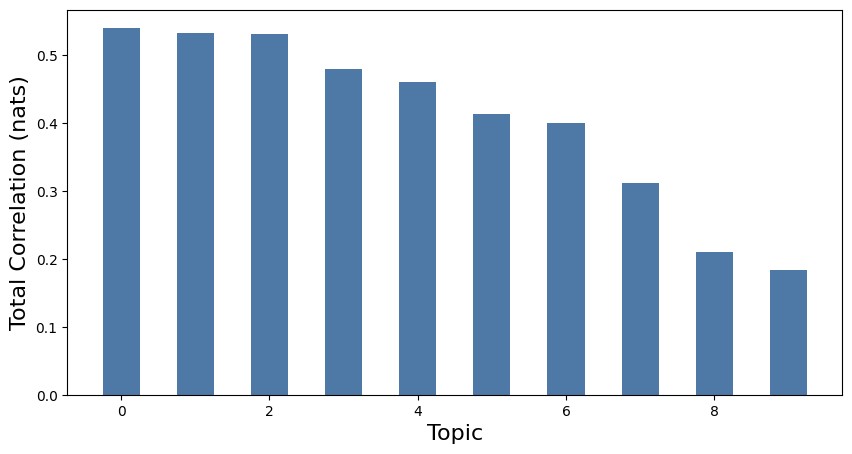

In [ ]:
#Selecting number of topics:Choosing from the data visualised
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);
plt.savefig('Distribution of TCs for each topic', dpi=600)

In [ ]:
topic_model.log_z.shape # n_docs x k_topics

(517, 10)

In [ ]:
print(np.mean(topic_model.log_z, axis=0)) #The pointwise total correlations in log_z represent the correlations within an individual document explained by a particular topic. These correlations have been used to measure how "surprising" documents are with respect to given topics
print(topic_model.tcs)

[0.54034857 0.5334338  0.53092692 0.4800292  0.46050764 0.41428891
 0.39970473 0.3124242  0.21002857 0.1835461 ]
[0.54034857 0.5334338  0.53092692 0.4800292  0.46050764 0.41428891
 0.39970473 0.3124242  0.21002857 0.1835461 ]


In [ ]:
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

In [ ]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 110.000000 edges 


In [ ]:
!pip install tqdm

In [ ]:
## defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [ ]:
# Get the word count
df['word_count'] = df['body'].apply(word_count)
df['word_count'].mean()

7.733075435203094

In [ ]:
# Process the text
df['processed_text'] = df['body'].apply(process_text)
df.head()

,LOGICIEL,CRITICITE,ID TICKET,TYPE TICKET,PRIORITE,SUJET,STATUT,DATE SIGNALISATION,ETAT REVERSEMENT,VERSION INCLUANT LE REVERSEMENT,body,word_count,processed_text
0,KVM,Non-critique,34,Demande d'information,Non bloquant,Configuration réseaux vlans différents,9 - Fermé,11/26/2012 9:58,NaN,NaN,Configuring different vlan networks,4,"[configur, differ, vlan, network]"
1,Maarch Enterprise,Non-critique,62,Anomalie,Non bloquant,Gestion des versions d'un document enregistré ...,9 - Fermé,12/6/2012 17:25,Accepté sans modification,1.3,Version management of a saved document: access...,8,"[version, manag, save, document, access, problem]"
2,Maarch Enterprise,Non-critique,63,Anomalie,Bloquant,Création de document impossible derriere proxy,10 - Abandonné,12/6/2012 17:30,NaN,NaN,Document creation impossible behind proxy,5,"[document, creation, imposs, proxi]"
3,Maarch Enterprise,Non-critique,64,Anomalie,Bloquant,Impossibilité d'utiliser la fonctionnalité de ...,9 - Fermé,12/6/2012 17:33,NaN,NaN,Impossible to use the document generation func...,13,"[imposs, use, document, generat, function, off..."
4,Maarch Enterprise,Non-critique,65,Anomalie,Non bloquant,Suppression de Corbeille,9 - Fermé,12/6/2012 17:36,Accepté sans modification,1.3,Deleting Trash,2,"[delet, trash]"


In [ ]:
!pip install tqdm
!pip install stylegan2_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 329.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.2 MB/s et

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from tqdm import tqdm as tqdm

# Use Gensim's CorEX to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Creating corpus using dictionary prepared above
corpus = [dictionary.doc2bow(doc) for doc in tqdm(texts)]

# Get top words for each topic from the trained corex model
topics = topic_model.get_topics(n_words=100)
corex_topic_words = [[word for word, tc,_ in topic] for topic in topics]

100%|██████████| 517/517 [00:00<00:00, 108173.96it/s]


In [ ]:
topics

[[('migration', 0.14506009851685828, 1.0),
  ('icasso', 0.11712596496643286, 1.0),
  ('database', 0.05293085743022999, 1.0),
  ('wheezy', 0.03459131902905255, 1.0),
  ('postgresql', 0.034591111847987493, 1.0),
  ('updating', 0.022642405723637116, 1.0),
  ('etch', 0.022577637605441632, 1.0),
  ('conf', 0.01820624621177456, 1.0),
  ('cyrus', 0.016881446046067738, 1.0),
  ('instance', 0.016632223980454955, 1.0),
  ('automaton', 0.016632223980454955, 1.0),
  ('final', 0.016632223980454955, 1.0),
  ('production', 0.016632223980454955, 1.0),
  ('directory', 0.015711024821821726, 1.0),
  ('folders', 0.011337272960304026, 1.0),
  ('renameentite', 0.011337234398937465, 1.0),
  ('packages', 0.010726766924873683, 1.0),
  ('du', 0.010726766924873683, 1.0),
  ('pentaho', 0.010726766924873683, 1.0),
  ('running', 0.010726766924873683, 1.0),
  ('platform', 0.010726766924873683, 1.0),
  ('i1', 0.010726766924873683, 1.0),
  ('i2', 0.010726766924873683, 1.0),
  ('based', 0.010726766924873683, 1.0),
  ('

In [ ]:
# Get coherence score
c_v_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
c_v_cm_corex.get_coherence()

0.4815246979171907

In [ ]:
# Get coherence score
u_mass_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='u_mass')
u_mass_cm_corex.get_coherence()

-18.7793655343436

In [ ]:
# Get coherence score
c_uci_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_uci')
c_uci_cm_corex.get_coherence()

-14.190163078440397

In [ ]:
# Get coherence score
c_npmi_cm_corex = CoherenceModel(topics=corex_topic_words, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_npmi')
c_npmi_cm_corex.get_coherence()

-0.44581259054100075